In [24]:
# Import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pickle


In [45]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset.csv')
# Display the first few rows of the dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [46]:
#how many data-points and features?
df.shape

(2016, 9)

In [47]:
#What are the column names in our dataset?
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2016 non-null   object 
 1   AUSPRAEGUNG                     2016 non-null   object 
 2   JAHR                            2016 non-null   int64  
 3   MONAT                           2016 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1848 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 141.9+ KB


In [49]:
# Drop unnecessary columns
df = df[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN


In [50]:
# Rename the columns we will be working on 
df = df.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})
df.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN


In [51]:
# Keep records until 2020
df = df[df['Year'] <= 2020]
df.head()

,Category,Accident_Type,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,202001,28.0
37,Alkoholunfälle,insgesamt,2020,202002,40.0
38,Alkoholunfälle,insgesamt,2020,202003,27.0
39,Alkoholunfälle,insgesamt,2020,202004,26.0
40,Alkoholunfälle,insgesamt,2020,202005,40.0


In [52]:
# Remove Year from the month from the combined column
df['Month'] = pd.to_datetime(df['Month'], format='%Y%m').dt.month
df.head()

,Category,Accident_Type,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,1,28.0
37,Alkoholunfälle,insgesamt,2020,2,40.0
38,Alkoholunfälle,insgesamt,2020,3,27.0
39,Alkoholunfälle,insgesamt,2020,4,26.0
40,Alkoholunfälle,insgesamt,2020,5,40.0


In [53]:
df.shape


(1764, 5)

# Visualizing the data set  per category
 

In [39]:
# lets see how many type of category are their

df['Category'].unique()




array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [58]:
(df.groupby([df.Year,df.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Year,,,
2000,24,24,36
2001,24,24,36
2002,24,24,36
2003,24,24,36
2004,24,24,36
2005,24,24,36
2006,24,24,36
2007,24,24,36
2008,24,24,36


above data gives that all have same number of deaths per year and per category

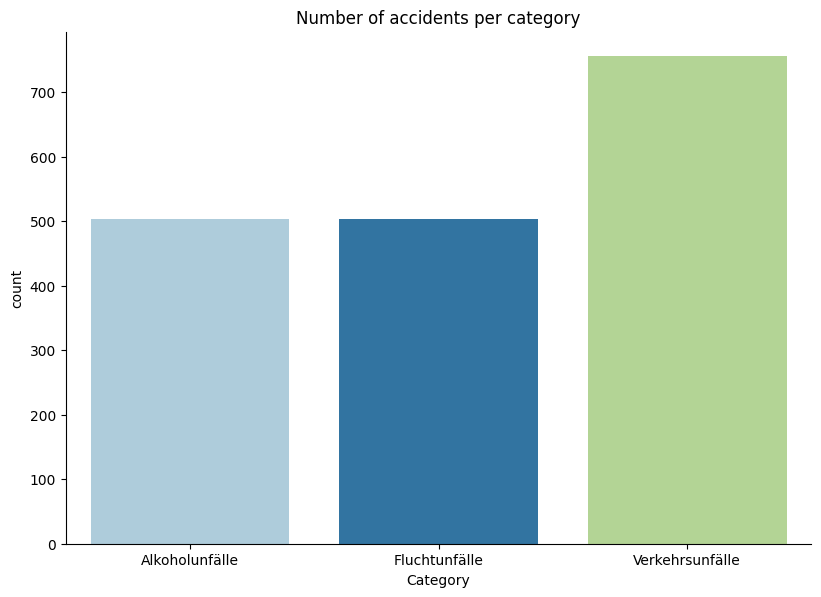

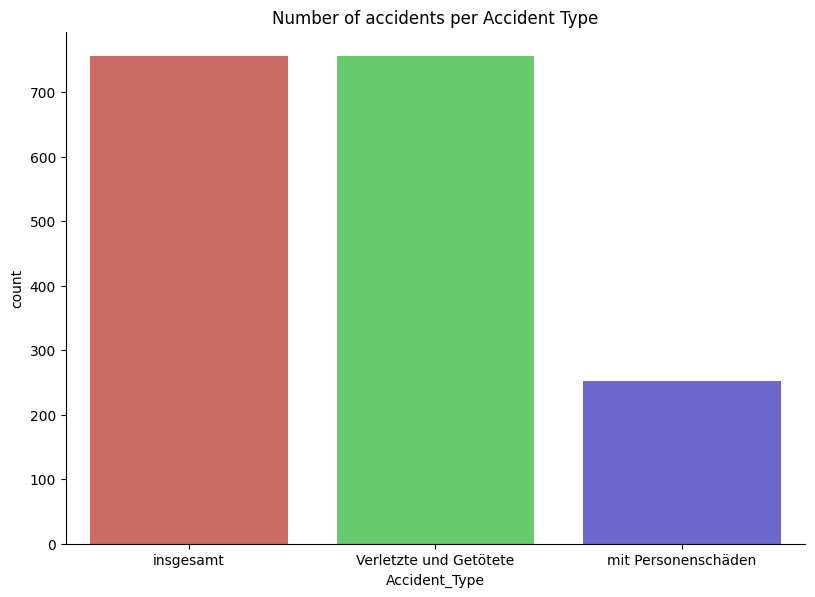

In [63]:
plot = sns.catplot(x="Category", kind="count", data=df, palette="Paired")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=df, palette="hls")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)
     

<function matplotlib.pyplot.show(close=None, block=None)>

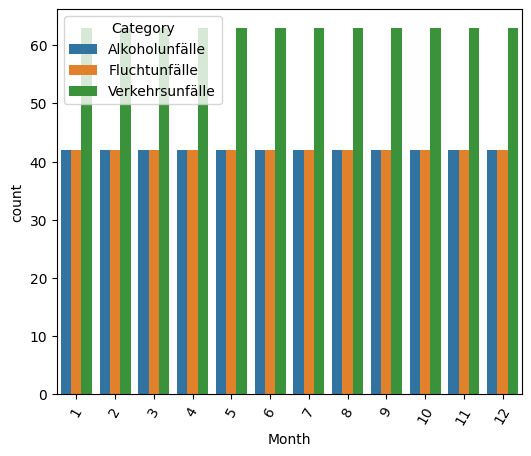

In [60]:
# plot the bar plot of Category and Month
plt.figure(figsize=(6,5))
sns.countplot(x='Month', hue='Category', data=df)
plt.xlabel('Month')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

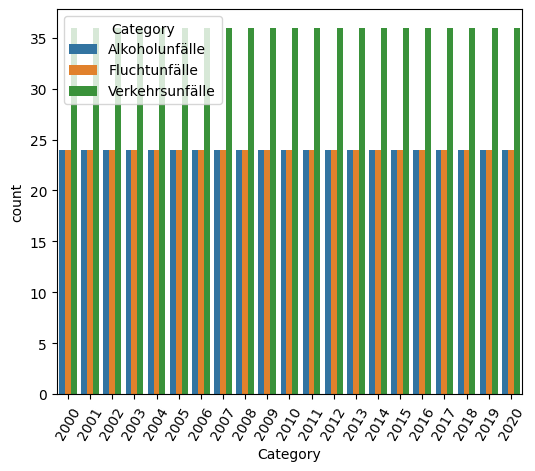

In [61]:

# plot the bar plot of Category and year
plt.figure(figsize=(6,5))
sns.countplot(x='Year', hue='Category', data=df)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

from the above graphs i can observe 2 thing

1) no of accidents for the  different category, Verkehrsunfälle have high accident rate
1) no of accidents for the  different type, mit Personenschaden have high accident rate